# Master TIDE - Conférences Python 2021

Francis Wolinski

&copy; 2021 Yotta Conseil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

# display options
pd.set_option("display.max_rows", 20)

# 10. Séries temporelles


Introduction aux séries temporelles avec Python et pandas.

Le module standard `datetime` permet de manipuler des données temporelles avec Python.

Il existe d'autres modules avec le même objectif: `calendar`, `dateutil`, `pytz`, ...

Le module `datetime` fournit différents types de données temporelles :

- **date**: date (année, mois, jour) dans le caledrier Grégorien
- **time**: temps non rattaché à une date (heures, minutes, secondes, microsecondes)
- **datetime**: horodatage (date + temps)
- **timedelta**: durée, difference entre 2 dates ou 2 temps (jours, heures, minutes, secondes, microsecondes)
- **tzinfo**: gestion des fuseaux horaires

In [2]:
# import de la librairie datetime
import datetime

## 10.1 Objets temporels Python

### Date

In [3]:
# date
today = datetime.date.today()
today

datetime.date(2021, 11, 25)

### Datetime

In [4]:
# datetime
now = datetime.datetime.now()
now

datetime.datetime(2021, 11, 25, 14, 10, 38, 29282)

In [5]:
# datetime en temps universel
now_utc = datetime.datetime.utcnow()
now_utc

datetime.datetime(2021, 11, 25, 13, 11, 14, 139333)

In [6]:
today - datetime.timedelta(100)

datetime.date(2021, 8, 17)

In [7]:
today + datetime.timedelta(100)

datetime.date(2022, 3, 5)

In [8]:
today - datetime.date(2021, 1, 1)

datetime.timedelta(days=328)

### Fuseau horaire

Le module standard `pytz` gère les fuseaux horaires.

Un objet de type `datetime` peut être converti avec la méthode `astimezone()` dans un objet `datetime` d'un autre fuseau horaire.

Il est recommandé de travailler en temps universel (UTC) pour pallier la difficulté de gérer des objets de temps de différents fuseaux horaires.

In [10]:
# import pytz
from pytz import timezone

In [11]:
# instance de fuseau horaire
tz = timezone('Asia/Shanghai')
tz

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

In [12]:
# now
now

datetime.datetime(2021, 11, 25, 14, 10, 38, 29282)

In [13]:
# convertit une datetime avec un objet de type fuseau horaire
now.astimezone(tz)

datetime.datetime(2021, 11, 25, 21, 10, 38, 29282, tzinfo=<DstTzInfo 'Asia/Shanghai' CST+8:00:00 STD>)

## 10.2 Ecriture et lecture

La méthode `strftime()` et la fonction `strptime()`  permettent d'écrire et de lire des dates dans différents formats avec une codificaton empruntée au langage C.

Le nombre de directives disponibles révèle la complexité du sujet.

Directives | Commentaires
- | -
%a | Day of the week abbreviated
%A | Day of the week
%w | Day of the week 0 = Sunday ... 6 = Saturday
%d | Day of month on 2 digits 01, 02, ..., 31
%j | Day of year on 3 digits 001, 002, ..., 366
%b | Month abbreviated
%B | Month name
%m | Month on 2 digits 01, 02, ..., 12
%U | Number of week in year (Sunday = first day)
%W | Number of week in year (Monday = first day)
%y | Year without the century on 2 digits 00, 01, ..., 99	 
%Y | Year with the century on 4 digits 0001, 0002, ..., 2018, 2019, ..., 9998, 9999
%H | Hour over 24 00, 01, ..., 23
%I | Hour over 12 01, 02, ..., 12
%p | AM or PM
%M | Minute on 2 digits 00, 01, ..., 59
%S | Second on 2 digits 00, 01, ..., 59
%f | Microsecond on 6 digits 000000, 000001, ..., 999999
%z | UTC offset +HHMM or -HHMM
%Z | Time zone 
%c | Representation date and temps
%x | Representation date
%X | Representation time
%% | Character %

In [14]:
# datetime
now = datetime.datetime.now()
now

datetime.datetime(2021, 11, 25, 14, 21, 48, 172785)

In [17]:
# jour de la semaine
now.strftime("%A %d/%m/%Y")

'Thursday 25/11/2021'

<div class="alert alert-success">
<b>Exercice 1</b>
<ul>
<li>Afficher la date du jour dans le format: `AAAA-MM-JJ/HH:MM:SS`</li>
</ul>
</div>

In [19]:
now.strftime("%Y-%m-%d/%H:%M:%S")

'2021-11-25/14:21:48'

Le module `locale` permet de gérer l'affichage selon la langue, par défaut en anglais.

In [28]:
import locale
#locale.setlocale(locale.LC_ALL, 'fr') # français
locale.setlocale(locale.LC_ALL, 'fr_FR') # français
#locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8') # français

print(now.strftime("%B %A %d/%m/%Y"))

locale.setlocale(locale.LC_ALL, 'en') # anglais
#locale.setlocale(locale.LC_ALL, 'en_US') # anglais

novembre jeudi 25/11/2021


'en'

In [29]:
#locale.setlocale(locale.LC_ALL, 'hi')
print(now.strftime("%B %A %d/%m/%Y"))

November Thursday 25/11/2021


Inversement la fonction `strptime()` prend une chaine de caractères et un format de date en arguments et retourne un objet temporel.

In [30]:
# lecture à partir du format: AA-MM-DD-HH-MM
# écriture dans le format : HH:MM DD/MM/YYYY
var = datetime.datetime.strptime("20-03-26-15-00", "%y-%m-%d-%H-%M")
var.strftime("%H:%M %d/%m/%Y")

'15:00 26/03/2020'

<div class="alert alert-success">
<b>Exercice 2</b>
<ul>
<li>Lire une date au format ISO : `AAAA-MM-JJTHH:MM:SS`, par exemple 2020-03-26T15:00:00</li>
</ul>
</div>

In [34]:
datetime.datetime.strptime("2020-03-26T15:00:00", "%Y-%m-%dT%H:%M:%S")

datetime.datetime(2020, 3, 26, 15, 0)

<div class="alert alert-success">
<b>Exercice 3</b>
<ul>
    <li>Charger le fichier 'cities500.zip', combien y a-t-il de fuseaux horaires différents ?</li>
    <li>Convertir la colonne 'timezone' en objets de type fuseau horaire.</li>
    <li>Prendre l'horodatage du jour et la convertir selon chaque fuseau horaire et produire une chaine au format : '%Y-%m-%d %H:%M:%S'.</li>
    <li> Il y a 24 heure dans une journée, combien y a-t-il de fuseaux horaires différents ?</li>
</ul>
</div>

In [35]:
# cities500.txt
# http://download.geonames.org/export/dump/cities500.zip
df = pd.read_csv('cities500.zip',
                   sep='\t',
                   header=None,
                   names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature class', 'feature code', 'country code', 'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code', 'population', 'elevation', 'dem', 'timezone', 'modification date'],
                   dtype={'admin1 code': str, 'admin2 code': str, 'admin3 code': str, 'admin4 code': str},
                   keep_default_na=False,
                   na_values=['', -9999])
df.head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin4 code,population,elevation,dem,timezone,modification date
0,3038999,Soldeu,Soldeu,NaN,42.57688,1.66769,P,PPL,AD,NaN,02,NaN,NaN,NaN,602,NaN,1832.0,Europe/Andorra,2017-11-06
1,3039154,El Tarter,El Tarter,"Ehl Tarter,Эл Тартер",42.57952,1.65362,P,PPL,AD,NaN,02,NaN,NaN,NaN,1052,NaN,1721.0,Europe/Andorra,2012-11-03
2,3039163,Sant Julià de Lòria,Sant Julia de Loria,"San Julia,San Julià,Sant Julia de Loria,Sant J...",42.46372,1.49129,P,PPLA,AD,NaN,06,NaN,NaN,NaN,8022,NaN,921.0,Europe/Andorra,2013-11-23
3,3039604,Pas de la Casa,Pas de la Casa,"Pas de la Kasa,Пас де ла Каса",42.54277,1.73361,P,PPL,AD,NaN,03,NaN,NaN,NaN,2363,2050.0,2106.0,Europe/Andorra,2008-06-09
4,3039678,Ordino,Ordino,"Ordino,ao er di nuo,orudino jiao qu,Ордино,オルデ...",42.55623,1.53319,P,PPLA,AD,NaN,05,NaN,NaN,NaN,3066,NaN,1296.0,Europe/Andorra,2018-10-26


In [36]:
df['timezone'].nunique()

400

In [37]:
df['timezone'].values

array(['Europe/Andorra', 'Europe/Andorra', 'Europe/Andorra', ...,
       'Africa/Harare', 'Africa/Harare', 'Africa/Harare'], dtype=object)

In [39]:
# df = df.loc[~df['timezone'].isin(['America/Nuuk'])]
timezones = df['timezone'].apply(timezone)
timezones

0         Europe/Andorra
1         Europe/Andorra
2         Europe/Andorra
3         Europe/Andorra
4         Europe/Andorra
               ...      
197244     Africa/Harare
197245     Africa/Harare
197246     Africa/Harare
197247     Africa/Harare
197248     Africa/Harare
Name: timezone, Length: 197249, dtype: object

In [40]:
timezones.values

array([<DstTzInfo 'Europe/Andorra' LMT+0:06:00 STD>,
       <DstTzInfo 'Europe/Andorra' LMT+0:06:00 STD>,
       <DstTzInfo 'Europe/Andorra' LMT+0:06:00 STD>, ...,
       <DstTzInfo 'Africa/Harare' LMT+2:10:00 STD>,
       <DstTzInfo 'Africa/Harare' LMT+2:10:00 STD>,
       <DstTzInfo 'Africa/Harare' LMT+2:10:00 STD>], dtype=object)

In [41]:
now

datetime.datetime(2021, 11, 25, 14, 21, 48, 172785)

In [43]:
heures = timezones.apply(lambda tz: now.astimezone(tz))
heures

0         2021-11-25 14:21:48.172785+01:00
1         2021-11-25 14:21:48.172785+01:00
2         2021-11-25 14:21:48.172785+01:00
3         2021-11-25 14:21:48.172785+01:00
4         2021-11-25 14:21:48.172785+01:00
                        ...               
197244    2021-11-25 15:21:48.172785+02:00
197245    2021-11-25 15:21:48.172785+02:00
197246    2021-11-25 15:21:48.172785+02:00
197247    2021-11-25 15:21:48.172785+02:00
197248    2021-11-25 15:21:48.172785+02:00
Name: timezone, Length: 197249, dtype: object

In [44]:
timezones.apply(now.astimezone)

0         2021-11-25 14:21:48.172785+01:00
1         2021-11-25 14:21:48.172785+01:00
2         2021-11-25 14:21:48.172785+01:00
3         2021-11-25 14:21:48.172785+01:00
4         2021-11-25 14:21:48.172785+01:00
                        ...               
197244    2021-11-25 15:21:48.172785+02:00
197245    2021-11-25 15:21:48.172785+02:00
197246    2021-11-25 15:21:48.172785+02:00
197247    2021-11-25 15:21:48.172785+02:00
197248    2021-11-25 15:21:48.172785+02:00
Name: timezone, Length: 197249, dtype: object

In [45]:
heures.values

array([datetime.datetime(2021, 11, 25, 14, 21, 48, 172785, tzinfo=<DstTzInfo 'Europe/Andorra' CET+1:00:00 STD>),
       datetime.datetime(2021, 11, 25, 14, 21, 48, 172785, tzinfo=<DstTzInfo 'Europe/Andorra' CET+1:00:00 STD>),
       datetime.datetime(2021, 11, 25, 14, 21, 48, 172785, tzinfo=<DstTzInfo 'Europe/Andorra' CET+1:00:00 STD>),
       ...,
       datetime.datetime(2021, 11, 25, 15, 21, 48, 172785, tzinfo=<DstTzInfo 'Africa/Harare' CAT+2:00:00 STD>),
       datetime.datetime(2021, 11, 25, 15, 21, 48, 172785, tzinfo=<DstTzInfo 'Africa/Harare' CAT+2:00:00 STD>),
       datetime.datetime(2021, 11, 25, 15, 21, 48, 172785, tzinfo=<DstTzInfo 'Africa/Harare' CAT+2:00:00 STD>)],
      dtype=object)

In [48]:
heures.apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S")).nunique()

36

## 10.3 Séries temporelles

Le librairie `pandas` gère les séries temporelles.

Nous allons introduire quelques notions :
- lecture de données temporelles
- accès aux données temporelles
- calcul d'agrégats temporels
- graphiques et fenêtres glissantes

### Chargement et préparation des données

In [52]:
# source:
# https://www.banque-france.fr/statistiques/taux-et-cours/les-taux-de-change-salle-des-marches/parites-quotidiennes

# chargement du fichier
tx_change = pd.read_csv("Webstat_Export.csv",
                        sep=";",
                        na_values='-',
                        decimal=',',
                        skiprows=[1, 2],  # le skiprows permet à l'option "decimal" de fonctionner
                        usecols=range(43),
                        converters={0: lambda x: pd.to_datetime(x, format='%d/%m/%Y', errors='ignore')})
tx_change

,Titre :,"Taux de change effectif réel - 36 partenaires commerciaux, variation sur 3 ans",Taux de change effectif réel - 16 partenaires commerciaux (zone euro),Dollar australien (AUD),Lev bulgare (BGN),Real brésilien (BRL),Dollar canadien (CAD),Franc suisse (CHF),Yuan renminbi chinois (CNY),Livre chypriote (CYP),...,Leu roumain (RON),Rouble russe (RUB),Couronne suédoise (SEK),Dollar de Singapour (SGD),Tolar slovène (SIT),Couronne slovaque (SKK),Baht thaïlandais (THB),Livre turque (TRY),Dollar des Etats-Unis (USD),Cours de l'or contre dollar - 1er fixing à Londres
0,2021-10-29,NaN,NaN,1.5455,1.9558,6.5698,1.4383,1.0611,7.4488,NaN,...,4.9493,82.3284,9.9368,1.5676,NaN,NaN,38.7200,11.1393,1.1645,1796.30
1,2021-10-28,NaN,NaN,1.5411,1.9558,6.4798,1.4325,1.0656,7.4169,NaN,...,4.9495,81.6042,9.9690,1.5623,NaN,NaN,38.5470,11.1435,1.1593,1798.20
2,2021-10-27,NaN,NaN,1.5458,1.9558,6.4510,1.4414,1.0670,7.4260,NaN,...,4.9484,81.4950,9.9713,1.5665,NaN,NaN,38.6500,11.0173,1.1617,1783.85
3,2021-10-26,NaN,NaN,1.5465,1.9558,6.4620,1.4361,1.0684,7.4124,NaN,...,4.9468,80.6417,9.9848,1.5637,NaN,NaN,38.4560,10.9744,1.1618,1801.90
4,2021-10-25,NaN,NaN,1.5505,1.9558,6.5405,1.4347,1.0666,7.4142,NaN,...,4.9475,81.1067,10.0000,1.5633,NaN,NaN,38.4230,11.2232,1.1603,1799.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,1999-01-07,NaN,NaN,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,...,1.3092,26.9876,9.1800,1.9436,188.800,42.765,42.1678,0.3701,1.1632,NaN
8332,1999-01-06,NaN,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,...,1.3168,27.4315,9.3050,1.9699,188.700,42.778,42.6949,0.3722,1.1743,NaN
8333,1999-01-05,NaN,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,...,1.3168,26.5876,9.4025,1.9655,188.775,42.848,42.5048,0.3728,1.1790,NaN
8334,1999-01-04,NaN,NaN,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,...,1.3111,25.2875,9.4696,1.9554,189.045,42.991,42.6799,0.3723,1.1789,NaN


#### Préparation des données :

- extraction des codes ISO des devises
- sélection de quelques devises
- drop NaN

In [54]:
tx_change.columns.tolist()

['Titre :',
 'Taux de change effectif réel - 36 partenaires commerciaux, variation sur 3 ans',
 'Taux de change effectif réel - 16 partenaires commerciaux (zone euro)',
 'Dollar australien (AUD)',
 'Lev bulgare (BGN)',
 'Real brésilien (BRL)',
 'Dollar canadien (CAD)',
 'Franc suisse (CHF)',
 'Yuan renminbi chinois (CNY)',
 'Livre chypriote (CYP)',
 'Couronne tchèque (CZK)',
 'Couronne danoise (DKK)',
 'Couronne estonienne (EEK)',
 "Cours de l'or contre euro - 1er fixing à Londres",
 'Livre sterling (GBP)',
 'Dollar de Hong Kong (HKD)',
 'Kuna croate (HRK)',
 'Forint hongrois (HUF)',
 'Roupie indonésienne (IDR)',
 'Sheqel israélien (ILS)',
 'Roupie Indienne (100 paise)',
 'Couronne islandaise (ISK)',
 'Yen japonais (JPY)',
 'Won coréen (KRW)',
 'Litas lituanien (LTL)',
 'Lats letton (LVL)',
 'Livre maltaise (MTL)',
 'Peso méxicain (MXN)',
 'Ringgit malaisien (MYR)',
 'Couronne norvégienne (NOK)',
 'Dollar neo-zélandais (NZD)',
 'Peso philippin (PHP)',
 'Zloty polonais (PLN)',
 'Leu rou

In [55]:
pd.Series(tx_change.columns.tolist())

0                                               Titre :
1     Taux de change effectif réel - 36 partenaires ...
2     Taux de change effectif réel - 16 partenaires ...
3                               Dollar australien (AUD)
4                                     Lev bulgare (BGN)
                            ...                        
38                              Couronne slovaque (SKK)
39                               Baht thaïlandais (THB)
40                                   Livre turque (TRY)
41                          Dollar des Etats-Unis (USD)
42    Cours de l'or contre dollar - 1er fixing à Lon...
Length: 43, dtype: object

In [53]:
pd.Series(tx_change.columns.tolist()).str.extract('\(([A-Z]{3})\)', expand=False)

0     NaN
1     NaN
2     NaN
3     AUD
4     BGN
     ... 
38    SKK
39    THB
40    TRY
41    USD
42    NaN
Length: 43, dtype: object

In [56]:
# extraction des codes monnaies
cols = pd.Series(tx_change.columns.tolist()).str.extract('\(([A-Z]{3})\)', expand=False)
tx_change.columns = ['Date'] + list(cols[1:])

# sélection de quelques colonnes monnaies
currencies = ['USD', 'CHF', 'GBP', 'JPY', 'RUB', 'CNY']
tx_change = tx_change[['Date'] + currencies]

# drop na
tx_change = tx_change.dropna()

tx_change

,Date,USD,CHF,GBP,JPY,RUB,CNY
0,2021-10-29,1.1645,1.0611,0.84490,132.62,82.3284,7.4488
1,2021-10-28,1.1593,1.0656,0.84373,131.70,81.6042,7.4169
2,2021-10-27,1.1617,1.0670,0.84530,132.00,81.4950,7.4260
3,2021-10-26,1.1618,1.0684,0.84178,132.47,80.6417,7.4124
4,2021-10-25,1.1603,1.0666,0.84380,131.88,81.1067,7.4142
...,...,...,...,...,...,...,...
7954,2000-01-19,1.0105,1.6120,0.61720,106.99,28.8815,8.3639
7955,2000-01-18,1.0093,1.6131,0.61740,106.42,28.8510,8.3540
7956,2000-01-17,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
7959,2000-01-14,1.0225,1.6130,0.62210,108.05,29.2350,8.4632


In [57]:
# info
tx_change.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5578 entries, 0 to 7960
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5578 non-null   datetime64[ns]
 1   USD     5578 non-null   float64       
 2   CHF     5578 non-null   float64       
 3   GBP     5578 non-null   float64       
 4   JPY     5578 non-null   float64       
 5   RUB     5578 non-null   float64       
 6   CNY     5578 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 348.6 KB


### L'opérateur `dt`

L'opérateur `dt` se comporte de manière analogue à l'opérateur `str` pour les `Series`. Il permet d'accéder aux propriététs temporelles des éléments.

In [58]:
# date
tx_change['Date']

0      2021-10-29
1      2021-10-28
2      2021-10-27
3      2021-10-26
4      2021-10-25
          ...    
7954   2000-01-19
7955   2000-01-18
7956   2000-01-17
7959   2000-01-14
7960   2000-01-13
Name: Date, Length: 5578, dtype: datetime64[ns]

In [59]:
# les valeurs sont des numpy.datetime64
tx_change['Date'].values[0]

numpy.datetime64('2021-10-29T00:00:00.000000000')

In [60]:
# accès à l'année
tx_change['Date'].dt.year

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
7954    2000
7955    2000
7956    2000
7959    2000
7960    2000
Name: Date, Length: 5578, dtype: int64

In [61]:
# accès au mois
tx_change['Date'].dt.month

0       10
1       10
2       10
3       10
4       10
        ..
7954     1
7955     1
7956     1
7959     1
7960     1
Name: Date, Length: 5578, dtype: int64

In [62]:
# access aux jours de la semaine
tx_change['Date'].dt.weekday

0       4
1       3
2       2
3       1
4       0
       ..
7954    2
7955    1
7956    0
7959    4
7960    3
Name: Date, Length: 5578, dtype: int64

In [63]:
# valeurs uniques
tx_change['Date'].dt.weekday.unique()

array([4, 3, 2, 1, 0], dtype=int64)

### Sélection de données temporelles

Lorsque l'index est un objet de type `datetime`, il est possible d'opérer des sélections en utilisant des dates représentées par des chaines de caractères.

In [64]:
# setting the index as a datetime object
tx_change = tx_change.set_index('Date')
tx_change = tx_change.sort_index()
tx_change

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-01-13,1.0276,1.6111,0.62550,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,29.2350,8.4632
2000-01-17,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
2000-01-18,1.0093,1.6131,0.61740,106.42,28.8510,8.3540
2000-01-19,1.0105,1.6120,0.61720,106.99,28.8815,8.3639
...,...,...,...,...,...,...
2021-10-25,1.1603,1.0666,0.84380,131.88,81.1067,7.4142
2021-10-26,1.1618,1.0684,0.84178,132.47,80.6417,7.4124
2021-10-27,1.1617,1.0670,0.84530,132.00,81.4950,7.4260


In [65]:
tx_change.index

DatetimeIndex(['2000-01-13', '2000-01-14', '2000-01-17', '2000-01-18',
               '2000-01-19', '2000-01-20', '2000-01-21', '2000-01-24',
               '2000-01-25', '2000-01-26',
               ...
               '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21',
               '2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27',
               '2021-10-28', '2021-10-29'],
              dtype='datetime64[ns]', name='Date', length=5578, freq=None)

In [66]:
# année entière
tx_change.loc['2021']

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2021-01-04,1.2296,1.0811,0.90160,126.62,90.3420,7.9484
2021-01-05,1.2271,1.0803,0.90333,126.25,91.6715,7.9315
2021-01-06,1.2338,1.0821,0.90635,127.03,90.8175,7.9653
2021-01-07,1.2276,1.0833,0.90190,127.13,91.2000,7.9392
2021-01-08,1.2250,1.0827,0.90128,127.26,90.8000,7.9184
...,...,...,...,...,...,...
2021-10-25,1.1603,1.0666,0.84380,131.88,81.1067,7.4142
2021-10-26,1.1618,1.0684,0.84178,132.47,80.6417,7.4124
2021-10-27,1.1617,1.0670,0.84530,132.00,81.4950,7.4260


In [67]:
# un mois d'une année
tx_change.loc['2021/10']  # ou tx_change.loc['10/2021']

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2021-10-01,1.1600,1.0791,0.85653,128.97,84.7187,7.4781
2021-10-04,1.1636,1.0768,0.85530,129.21,84.7198,7.5013
2021-10-05,1.1602,1.0752,0.85173,128.99,84.1541,7.4805
2021-10-06,1.1542,1.0715,0.84970,128.52,83.6242,7.4407
2021-10-07,1.1562,1.0712,0.85023,128.78,83.1780,7.4536
...,...,...,...,...,...,...
2021-10-25,1.1603,1.0666,0.84380,131.88,81.1067,7.4142
2021-10-26,1.1618,1.0684,0.84178,132.47,80.6417,7.4124
2021-10-27,1.1617,1.0670,0.84530,132.00,81.4950,7.4260


In [68]:
# sélection de slices - la seconde période est incluse
tx_change['12/2020':'02/2021']

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2020-12-01,1.1968,1.0836,0.89798,124.92,90.7837,7.8639
2020-12-02,1.2066,1.0819,0.90490,126.13,91.3194,7.9203
2020-12-03,1.2151,1.0831,0.90358,126.49,90.8441,7.9567
2020-12-04,1.2159,1.0822,0.90282,126.44,90.0679,7.9421
2020-12-07,1.2128,1.0802,0.91215,126.30,89.7900,7.9310
...,...,...,...,...,...,...
2021-02-22,1.2133,1.0888,0.86530,128.00,90.9800,7.8447
2021-02-23,1.2143,1.0946,0.86308,127.98,89.9219,7.8506
2021-02-24,1.2146,1.1029,0.86030,128.69,89.4919,7.8362


### Complétion de données temporelles

In [69]:
tx_change.head(10)

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-01-13,1.0276,1.6111,0.6255,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.6221,108.05,29.2350,8.4632
2000-01-17,1.0094,1.6136,0.6180,105.81,28.9738,8.3548
2000-01-18,1.0093,1.6131,0.6174,106.42,28.8510,8.3540
2000-01-19,1.0105,1.6120,0.6172,106.99,28.8815,8.3639
2000-01-20,1.0089,1.6147,0.6127,106.44,28.8048,8.3507
2000-01-21,1.0097,1.6102,0.6113,105.53,28.8342,8.3573
2000-01-24,1.0027,1.6136,0.6062,105.54,28.6018,8.2993
2000-01-25,1.0008,1.6121,0.6083,105.69,28.5957,8.2836


In [70]:
pd.date_range(tx_change.index[0], tx_change.index[-1], freq='D')

DatetimeIndex(['2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22',
               ...
               '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-23',
               '2021-10-24', '2021-10-25', '2021-10-26', '2021-10-27',
               '2021-10-28', '2021-10-29'],
              dtype='datetime64[ns]', length=7961, freq='D')

In [71]:
# complétion des données sur une année
idx = pd.date_range(tx_change.index[0], tx_change.index[-1], freq='D')
tx_change_full = tx_change.reindex(idx)
tx_change_full

,USD,CHF,GBP,JPY,RUB,CNY
2000-01-13,1.0276,1.6111,0.62550,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,29.2350,8.4632
2000-01-15,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-16,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-17,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
...,...,...,...,...,...,...
2021-10-25,1.1603,1.0666,0.84380,131.88,81.1067,7.4142
2021-10-26,1.1618,1.0684,0.84178,132.47,80.6417,7.4124
2021-10-27,1.1617,1.0670,0.84530,132.00,81.4950,7.4260
2021-10-28,1.1593,1.0656,0.84373,131.70,81.6042,7.4169


In [72]:
tx_change_full.head(10)

,USD,CHF,GBP,JPY,RUB,CNY
2000-01-13,1.0276,1.6111,0.6255,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.6221,108.05,29.2350,8.4632
2000-01-15,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-16,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-17,1.0094,1.6136,0.6180,105.81,28.9738,8.3548
2000-01-18,1.0093,1.6131,0.6174,106.42,28.8510,8.3540
2000-01-19,1.0105,1.6120,0.6172,106.99,28.8815,8.3639
2000-01-20,1.0089,1.6147,0.6127,106.44,28.8048,8.3507
2000-01-21,1.0097,1.6102,0.6113,105.53,28.8342,8.3573
2000-01-22,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# forward filling
tx_change_full.fillna(method='ffill')

,USD,CHF,GBP,JPY,RUB,CNY
2000-01-13,1.0276,1.6111,0.62550,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,29.2350,8.4632
2000-01-15,1.0225,1.6130,0.62210,108.05,29.2350,8.4632
2000-01-16,1.0225,1.6130,0.62210,108.05,29.2350,8.4632
2000-01-17,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
...,...,...,...,...,...,...
2021-10-25,1.1603,1.0666,0.84380,131.88,81.1067,7.4142
2021-10-26,1.1618,1.0684,0.84178,132.47,80.6417,7.4124
2021-10-27,1.1617,1.0670,0.84530,132.00,81.4950,7.4260
2021-10-28,1.1593,1.0656,0.84373,131.70,81.6042,7.4169


In [74]:
# backward filling
tx_change_full.fillna(method='bfill')

,USD,CHF,GBP,JPY,RUB,CNY
2000-01-13,1.0276,1.6111,0.62550,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,29.2350,8.4632
2000-01-15,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
2000-01-16,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
2000-01-17,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
...,...,...,...,...,...,...
2021-10-25,1.1603,1.0666,0.84380,131.88,81.1067,7.4142
2021-10-26,1.1618,1.0684,0.84178,132.47,80.6417,7.4124
2021-10-27,1.1617,1.0670,0.84530,132.00,81.4950,7.4260
2021-10-28,1.1593,1.0656,0.84373,131.70,81.6042,7.4169


In [75]:
# interpolate
tx_change_full.interpolate()

,USD,CHF,GBP,JPY,RUB,CNY
2000-01-13,1.027600,1.6111,0.625500,108.890000,29.483700,8.505400
2000-01-14,1.022500,1.6130,0.622100,108.050000,29.235000,8.463200
2000-01-15,1.018133,1.6132,0.620733,107.303333,29.147933,8.427067
2000-01-16,1.013767,1.6134,0.619367,106.556667,29.060867,8.390933
2000-01-17,1.009400,1.6136,0.618000,105.810000,28.973800,8.354800
...,...,...,...,...,...,...
2021-10-25,1.160300,1.0666,0.843800,131.880000,81.106700,7.414200
2021-10-26,1.161800,1.0684,0.841780,132.470000,80.641700,7.412400
2021-10-27,1.161700,1.0670,0.845300,132.000000,81.495000,7.426000
2021-10-28,1.159300,1.0656,0.843730,131.700000,81.604200,7.416900


In [78]:
# numpy.linspace
np.linspace(0, 100, 21)

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [79]:
# numpy.linspace
arr = np.linspace(tx_change_full.iloc[1], tx_change_full.iloc[4], 4)
pd.DataFrame(arr)

,0,1,2,3,4,5
0,1.022500,1.6130,0.622100,108.050000,29.235000,8.463200
1,1.018133,1.6132,0.620733,107.303333,29.147933,8.427067
2,1.013767,1.6134,0.619367,106.556667,29.060867,8.390933
3,1.009400,1.6136,0.618000,105.810000,28.973800,8.354800


### Agrégations temporelles

Il est possible d'agréger les données selon une certain période de temps en utilisant la méthode `resample()` avec un symbol signifiant la période considérée en ensuite appliquer une méthode d'agrégat.

La méthode `resample()` agit de manière similaire à la méthode `groupby()`.

In [80]:
tx_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5578 entries, 2000-01-13 to 2021-10-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     5578 non-null   float64
 1   CHF     5578 non-null   float64
 2   GBP     5578 non-null   float64
 3   JPY     5578 non-null   float64
 4   RUB     5578 non-null   float64
 5   CNY     5578 non-null   float64
dtypes: float64(6)
memory usage: 434.1 KB


In [81]:
# agrégation annuelle
tx_change.resample('A').size()

Date
2000-12-31    247
2001-12-31    254
2002-12-31    255
2003-12-31    255
2004-12-31    259
             ... 
2017-12-31    255
2018-12-31    255
2019-12-31    255
2020-12-31    257
2021-12-31    213
Freq: A-DEC, Length: 22, dtype: int64

In [82]:
# agrégation annuelle
tx_change.resample('A').max()

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-12-31,1.0276,1.6147,0.64020,111.88,29.4837,8.5054
2001-12-31,0.9545,1.5434,0.64080,115.90,27.5286,7.9004
2002-12-31,1.0487,1.4856,0.65050,125.18,33.5108,8.6801
2003-12-31,1.2630,1.5729,0.72350,140.31,36.9555,10.4539
2004-12-31,1.3633,1.5838,0.70880,141.03,37.9096,11.2840
...,...,...,...,...,...,...
2017-12-31,1.2060,1.1772,0.92965,135.01,71.8059,7.9757
2018-12-31,1.2493,1.1986,0.90680,137.22,81.2688,8.0958
2019-12-31,1.1535,1.1470,0.92830,127.35,79.3589,7.9519


In [83]:
# agrégation mensuelle
tx_change.resample('M').mean()

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-01-31,1.004985,1.612115,0.612831,106.091538,28.742685,8.318246
2000-02-29,0.983424,1.606886,0.614657,107.640952,28.288986,8.139800
2000-03-31,0.964343,1.604243,0.610626,102.590870,27.466526,7.981870
2000-04-30,0.946950,1.573956,0.598017,99.924444,27.098239,7.837911
2000-05-31,0.905968,1.556164,0.601509,98.090455,25.657673,7.498705
...,...,...,...,...,...,...
2021-06-30,1.204709,1.094000,0.858720,132.631364,87.456068,7.739114
2021-07-31,1.182182,1.085595,0.856130,130.349091,87.397018,7.653632
2021-08-31,1.177182,1.076177,0.852874,129.284091,86.606650,7.623655


#### fréquences symboliques utilisables (extrait)

Alias | Offset type | Description
- | - | -
D | Day | Calendar daily
B | BusinessDay | Business daily
H | Hour | Hourly
T or min | Minute | Minutely
S | Second | Secondly
L or ms | Milli | Millisecond (1/1000th of 1 second)
U | Micro | Microsecond (1/1000000th of 1 second)
M | MonthEnd | Last calendar day of month
BM | BusinessMonthEnd | Last business day (weekday) of month
MS | MonthBegin | First calendar day of month
BMS | BusinessMonthBegin | First weekday of month
W-MON, W-TUE, ... | Week | Weekly on given day of week: MON, TUE, WED, THU, FRI, SAT, or SUN.
Q-JAN, Q-FEB, ... | QuarterEnd | Quarterly dates anchored on last calendar day of each month,for year ending in indicated month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.
A-JAN, A-FEB, ... | YearEnd | Annual dates anchored on last calendar day of given month: JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC.

Source: Python for Data Analysis, Wes McKinney, O'Reilly

### Graphiques temporels

Il est possible de produire directement des graphiques.

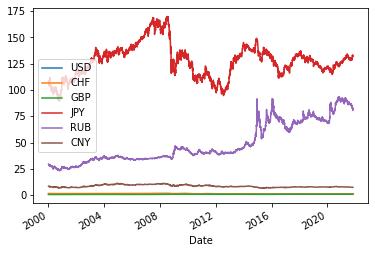

In [84]:
# taux de change
tx_change.plot();

Ci-dessous on divise les taux par leur moyenne respective afin d'ajuster les échelles et qu'elles soient comparables.

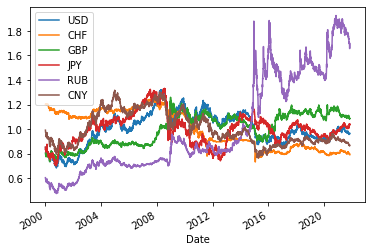

In [85]:
# taux de change divisés par leurs moyennes respectives
(tx_change / tx_change.mean()).plot();

La méthode `rolling()` permet de produire un graphique avec une moyenne mobile par exemple.

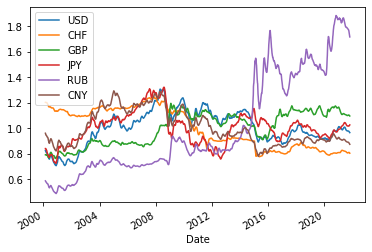

In [86]:
# taux de change divisés par leurs moyennes respectives avec une moyenne mobile de 30 jours
(tx_change / tx_change.mean()).rolling(30).mean().plot();

<div class="alert alert-success">
<b>Exercice 4</b>
<ul>
    <li>Afficher un graphique des taux de change divisés par leurs dernières valeurs</li>
    <li>Afficher un graphique des taux de change divisés par leurs dernières valeurs avec une moyenne mobile de 30 jours</li>
    <li>Afficher un graphique des taux de change divisés par leurs moyennes respectives avec un maximum mobile de 100 jours</li>
</ul>
</div>

In [87]:
tx_change.mean()

USD      1.205874
CHF      1.338836
GBP      0.776745
JPY    127.445014
RUB     48.689352
CNY      8.573021
dtype: float64

In [88]:
tx_change.iloc[-1]

USD      1.1645
CHF      1.0611
GBP      0.8449
JPY    132.6200
RUB     82.3284
CNY      7.4488
Name: 2021-10-29 00:00:00, dtype: float64

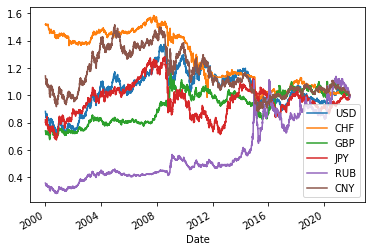

In [89]:
(tx_change / tx_change.iloc[-1]).plot();

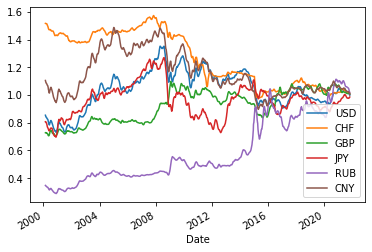

In [90]:
(tx_change / tx_change.iloc[-1]).rolling(30).mean().plot();

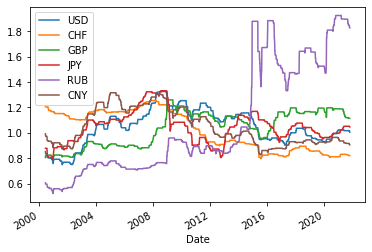

In [91]:
(tx_change / tx_change.mean()).rolling(100).max().plot();